In [ ]:
!pip install seaborn

In [ ]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
import os
sys_path = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
sys.path.append(sys_path)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Copy of may-movie-data-final.csv')

**Exploratory data Analysis**

In [ ]:
# null values in each column
df.isnull().sum()

Movie Title                       0
tmdb_popularity                   0
imdbRating                        0
imdbNumVotes                      0
runtimeMinutes                    0
Score_Rotten                    247
Score_Rotten_Audience           185
Rating                            0
NumTheatres                     311
mean_google_trend_popularity     93
director_popularity             278
producer_popularity             243
actors_popularity                 8
TwitterScore                     65
Budget                            0
Action                            0
Adventure                         0
Animation                         0
Biography                         0
Comedy                            0
Crime                             0
Documentary                       0
Drama                             0
Family                            0
Fantasy                           0
Film-Noir                         0
History                           0
Horror                      

In [ ]:
print(df.head())

            Movie Title  tmdb_popularity  imdbRating  imdbNumVotes  \
0    Intimate Strangers            2.791         6.6           160   
1            Aftershock           17.804         4.8         11745   
2  The Eleventh Chapter            1.342         6.8           383   
3        Spanish Affair            0.948         5.3            85   
4                 Gantz           40.465         6.4          7731   

   runtimeMinutes  Score_Rotten  Score_Rotten_Audience  Rating  NumTheatres  \
0             100           NaN                   82.0       2          NaN   
1              89         100.0                    NaN       2          NaN   
2             115           NaN                    NaN       2          NaN   
3              93           NaN                    NaN       2          NaN   
4             130           NaN                   58.0       2          NaN   

   mean_google_trend_popularity  ...  Thriller  War  Western  Release-Date  \
0                        4

total null values

In [ ]:
df.describe()

,tmdb_popularity,imdbRating,imdbNumVotes,runtimeMinutes,Score_Rotten,Score_Rotten_Audience,Rating,NumTheatres,mean_google_trend_popularity,director_popularity,...,Sport,Thriller,War,Western,Release-Year,Release-Month,Release-DOM,Revenue-Worldwide,Profit,Label
count,1618.000000,1618.000000,1.618000e+03,1618.000000,1371.000000,1433.000000,1618.000000,1307.000000,1525.000000,1340.000000,...,1618.000000,1618.000000,1618.000000,1618.000000,1572.000000,1572.000000,1572.000000,1.618000e+03,1618.000000,1618.000000
mean,90.629623,6.424475,1.511315e+05,111.852905,57.396791,62.952547,2.124227,68.172915,47.062295,7.091651,...,0.012979,0.152658,0.008035,0.004326,2015.278626,6.734733,16.218193,1.770335e+08,9.940162,0.833745
std,317.576346,0.973880,2.012969e+05,19.117367,27.049834,19.633741,0.682872,44.564705,15.983062,6.503903,...,0.113219,0.359768,0.089303,0.065653,3.407032,3.545143,8.366302,2.569134e+08,199.826489,0.886328
min,0.600000,1.600000,1.500000e+01,48.000000,0.000000,0.000000,0.000000,1.000000,12.500000,0.600000,...,0.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,1.440030e+05,-0.997019,0.000000
25%,18.383500,5.800000,2.527325e+04,98.000000,35.000000,48.000000,2.000000,31.000000,36.875000,2.835500,...,0.000000,0.000000,0.000000,0.000000,2012.000000,3.000000,9.000000,3.881412e+07,0.680118,0.000000
50%,35.766000,6.500000,8.444800e+04,109.000000,61.000000,64.000000,2.000000,63.000000,43.750000,5.452000,...,0.000000,0.000000,0.000000,0.000000,2015.000000,7.000000,17.000000,8.052874e+07,1.922937,1.000000
75%,79.029000,7.100000,1.896638e+05,123.000000,81.000000,80.000000,3.000000,101.000000,55.125000,8.616000,...,0.000000,0.000000,0.000000,0.000000,2018.000000,10.000000,23.000000,1.966145e+08,4.239644,2.000000
max,7358.500000,8.800000,2.255111e+06,212.000000,100.000000,100.000000,5.000000,199.000000,98.000000,39.917000,...,1.000000,1.000000,1.000000,1.000000,2022.000000,12.000000,31.000000,2.797801e+09,7999.000000,2.000000


In [ ]:
 li = []
 li = df['Release-Date']

In [ ]:
li_movies = []
li_movies = df['Movie Title']

In [ ]:
df = df.drop(['Release-Date'],axis = 1)

In [ ]:
df = df.drop(['Movie Title'],axis = 1)

In [ ]:
df = df.fillna(df.median())

In [ ]:
release_li =[]
for index, row in df.iterrows():
  release_li.append(str(int(row['Release-Year']))+"-"+str(int(row['Release-Month']))+"-"+str(int(row['Release-DOM'])))

In [ ]:
df = df.drop(['Release-Year','Release-Month','Release-DOM'],axis=1)

In [ ]:
print(release_li)

['2018-10-31', '2010-7-22', '2021-4-2', '2014-3-14', '2011-4-23', '2011-4-23', '2021-8-20', '2019-12-26', '2019-12-26', '2014-1-22', '2015-7-17', '2011-8-19', '2013-3-21', '2017-5-19', '2018-9-20', '2014-5-16', '2021-8-11', '2013-10-29', '2013-10-29', '2011-12-17', '2015-7-17', '2018-10-5', '2012-2-16', '2021-6-23', '2015-7-17', '2015-7-17', '2013-10-29', '2015-7-17', '2015-7-17', '2015-11-20', '2015-7-17', '2013-10-31', '2013-7-3', '2015-10-8', '2015-4-24', '2017-1-6', '2017-3-4', '2019-7-16', '2016-1-1', '2017-7-27', '2015-7-17', '2015-7-17', '2017-12-29', '2010-3-19', '2017-1-18', '2021-4-9', '2018-8-23', '2011-6-25', '2011-8-11', '2021-2-12', '2015-7-17', '2017-8-9', '2014-6-27', '2014-8-8', '2016-7-29', '2014-7-23', '2018-10-4', '2017-12-8', '2015-7-17', '2019-4-4', '2012-8-31', '2016-2-8', '2015-7-17', '2018-6-27', '2017-12-27', '2018-10-3', '2012-4-5', '2015-12-10', '2011-2-16', '2014-7-31', '2017-2-15', '2015-7-17', '2017-12-22', '2015-7-17', '2012-1-26', '2021-1-1', '2015-7-17

In [ ]:
df.rename(columns = {'Revenue-Worldwide':'Revenue'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


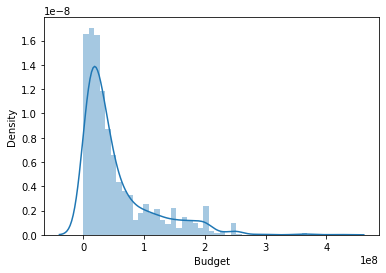

In [ ]:
sns.distplot(df.Budget);

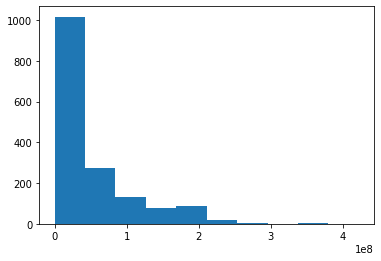

In [ ]:
plt.hist(df['Budget']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


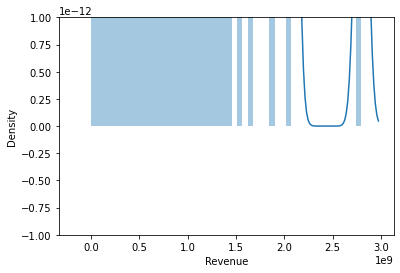

In [ ]:
sns.distplot(df.Revenue);

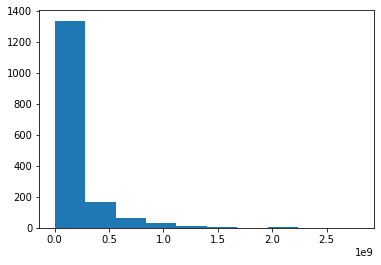

In [ ]:
plt.hist(df['Revenue']);

In [ ]:

release_li= pd.to_datetime(release_li) #converting into panda date time

In [ ]:
release_df = {'release_date': release_li}
release_df = pd.DataFrame(release_df)

In [ ]:
release_df

,release_date
0,2018-10-31
1,2010-07-22
2,2021-04-02
3,2014-03-14
4,2011-04-23
...,...
1613,2022-03-04
1614,2022-04-22
1615,2022-01-21
1616,2022-01-21


In [ ]:
def process_date(df_date):
    '''this function add column like 
     year, weeekday, month and so on column
    and add prefix of release_date before 
    all the above column eg realease_date_year'''
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part #add prefix as  "release_date" before the columne
        df[part_col] = getattr(release_df['release_date'].dt, part).astype(int)
    
    return df_date

In [ ]:
df = process_date(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [ ]:
print(df)

      tmdb_popularity  imdbRating  imdbNumVotes  runtimeMinutes  Score_Rotten  \
0               2.791         6.6           160             100          61.0   
1              17.804         4.8         11745              89         100.0   
2               1.342         6.8           383             115          61.0   
3               0.948         5.3            85              93          61.0   
4              40.465         6.4          7731             130          61.0   
...               ...         ...           ...             ...           ...   
1613           15.273         7.0         38061             152          91.0   
1614          708.384         7.0          1474             100          88.0   
1615            7.013         4.5           329             102          17.0   
1616          172.511         5.1          2689              90          18.0   
1617            8.418         6.7         28543             147          61.0   

      Score_Rotten_Audience

In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



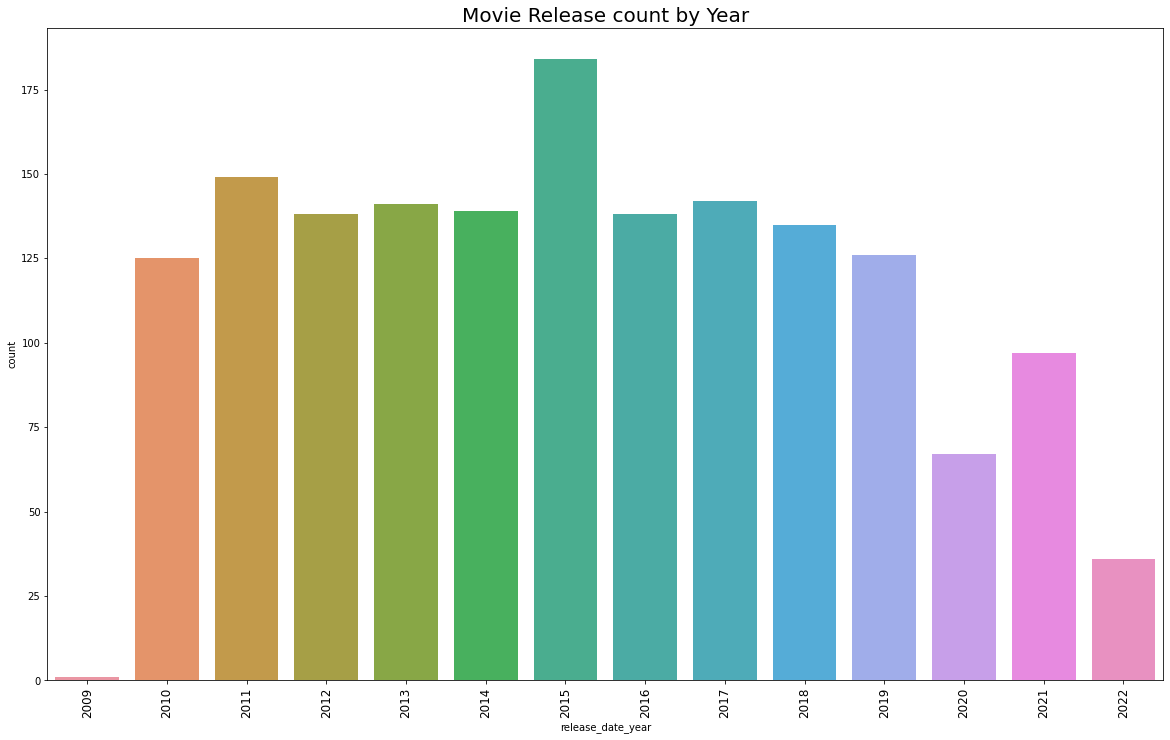

In [ ]:
#countplot chart for movies release year
plt.figure(figsize=(20,12))
sns.countplot(df['release_date_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [ ]:
#plot for release date vs revenue
d1 = df['release_date_year'].value_counts().sort_index()
d2 = df.groupby(['release_date_year'])['Revenue'].mean()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

<Figure size 1440x360 with 0 Axes>

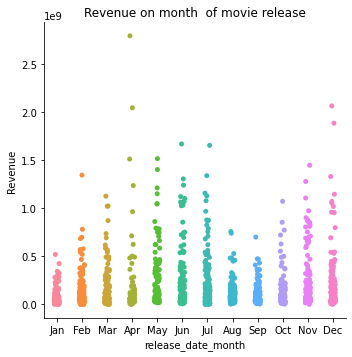

In [ ]:
#since day, month are categorical variable
plt.figure(figsize=(20,5));
sns.catplot(x='release_date_month', y='Revenue', data=df);
plt.title('Revenue on month  of movie release');
#lets replace number by actual month name
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()

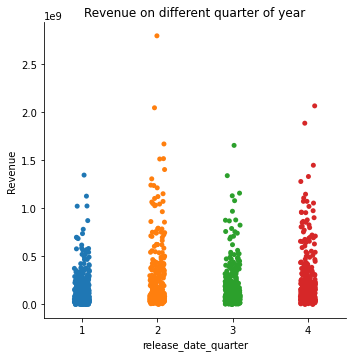

In [ ]:
sns.catplot(x='release_date_quarter', y='Revenue', data=df);
plt.title('Revenue on different quarter of year');

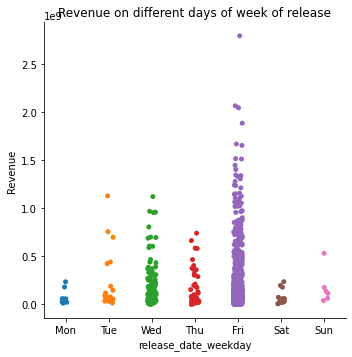

In [ ]:
sns.catplot(x='release_date_weekday', y='Revenue', data=df);
plt.title('Revenue on different days of week of release');
loc, labels = plt.xticks()
#putting label for days
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



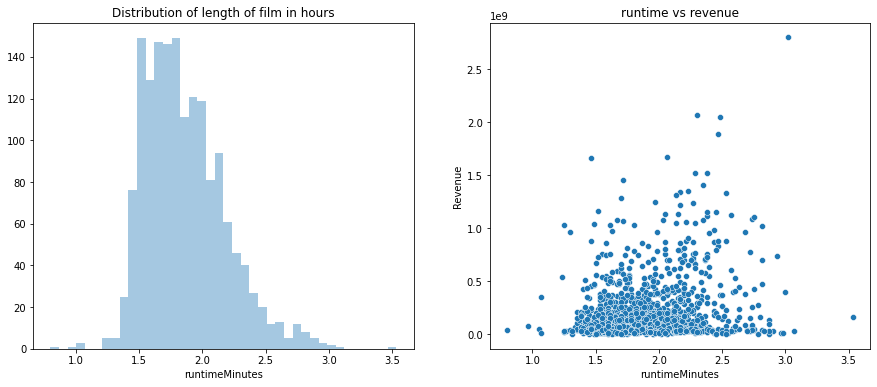

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['runtimeMinutes'].fillna(0) / 60, bins=40, kde=False); #filling runtime with 0 if there were any missing values
plt.title('Distribution of length of film in hours');
plt.subplot(1, 2, 2)
sns.scatterplot(df['runtimeMinutes'].fillna(0)/60, df['Revenue'])
plt.title('runtime vs revenue');

In [ ]:
output = []
output = df['Revenue']

In [ ]:
df.shape

(1618, 46)

In [ ]:
df.columns

Index(['tmdb_popularity', 'imdbRating', 'imdbNumVotes', 'runtimeMinutes',
       'Score_Rotten', 'Score_Rotten_Audience', 'Rating', 'NumTheatres',
       'mean_google_trend_popularity', 'director_popularity',
       'producer_popularity', 'actors_popularity', 'TwitterScore', 'Budget',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western', 'Revenue', 'Profit', 'Label',
       'release_date_year', 'release_date_weekday', 'release_date_month',
       'release_date_weekofyear', 'release_date_day', 'release_date_quarter'],
      dtype='object')

In [ ]:
df_numeric = df.filter(['tmdb_popularity', 'imdbRating','imdbNumVotes','runtimeMinutes','Score_Rotten', 'Score_Rotten_Audience',
                                         'NumTheatres','mean_google_trend_popularity', 'director_popularity',
'producer_popularity', 'actors_popularity', 'TwitterScore', 'Budget','Revenue','Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western'],axis = 1)

In [ ]:
df_numeric

,tmdb_popularity,imdbRating,imdbNumVotes,runtimeMinutes,Score_Rotten,Score_Rotten_Audience,NumTheatres,mean_google_trend_popularity,director_popularity,producer_popularity,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2.791,6.6,160,100,61.0,82.0,63.0,41.250,1.164,3.34200,...,0,0,0,0,0,0,0,0,0,0
1,17.804,4.8,11745,89,100.0,64.0,63.0,60.625,5.452,0.64750,...,0,0,0,0,0,0,0,0,0,0
2,1.342,6.8,383,115,61.0,64.0,63.0,12.500,5.452,3.34200,...,0,0,0,0,0,0,0,0,0,0
3,0.948,5.3,85,93,61.0,64.0,63.0,29.750,5.452,0.60000,...,0,0,0,0,0,0,0,0,0,0
4,40.465,6.4,7731,130,61.0,58.0,63.0,46.625,5.113,1.55300,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,15.273,7.0,38061,152,91.0,97.0,55.0,61.250,1.367,0.98350,...,0,0,0,0,0,0,0,0,0,0
1614,708.384,7.0,1474,100,88.0,64.0,63.0,64.875,2.848,0.93700,...,0,0,0,0,0,0,0,0,0,0
1615,7.013,4.5,329,102,17.0,73.0,53.0,21.375,0.656,0.60000,...,0,0,0,0,0,0,0,0,0,0
1616,172.511,5.1,2689,90,18.0,80.0,43.0,55.000,7.761,2.67475,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_plot = df_numeric.filter(['tmdb_popularity', 'imdbRating','imdbNumVotes','runtimeMinutes','Score_Rotten', 'Score_Rotten_Audience',
                                         'NumTheatres','mean_google_trend_popularity', 'director_popularity',
'producer_popularity', 'actors_popularity', 'TwitterScore', 'Budget','Revenue'],axis=1)

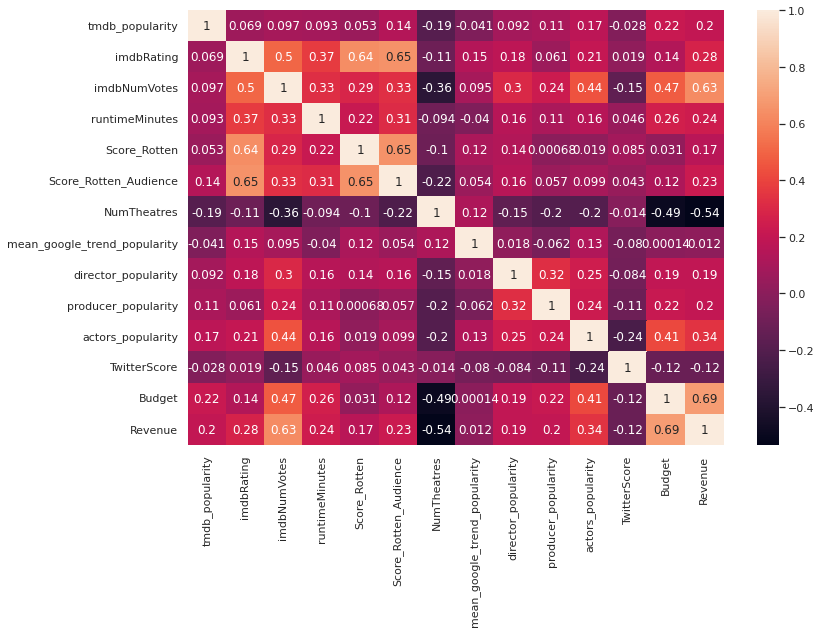

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df_plot.corr(),annot=True)
plt.show()

In [ ]:
li_1 = []
li_1 = df['release_date_year']
li_2 = []
li_2 = df['Rating']
li_3 = []
li_3 = df['release_date_quarter']

In [ ]:
df_category =  pd.DataFrame([],columns = ['release_date_year', 'Rating', 'release_date_quarter'])

In [ ]:
df_category['release_date_year'] = df['release_date_year']
df_category['release_date_quarter'] = df['release_date_quarter']
df_category['Rating'] = df['Rating']

In [ ]:
df_category.head()

,release_date_year,Rating,release_date_quarter
0,2018,2,4
1,2010,2,3
2,2021,2,2
3,2014,2,1
4,2011,2,2


In [ ]:
one_hot_df = pd.get_dummies(df_category,columns = ['release_date_year',
                                        'Rating','release_date_quarter'], prefix={'release_date_year':'release_date_year_',
                                        'Rating':'Rating_',
                                        'release_date_quarter':'release_date_quarter_'},
                            drop_first=True)

In [ ]:
one_hot_df

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,release_date_year__2021,release_date_year__2022,Rating__1,Rating__2,Rating__3,Rating__4,Rating__5,release_date_quarter__2,release_date_quarter__3,release_date_quarter__4
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1614,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1615,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1616,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([one_hot_df,df_numeric],axis = 1)

In [ ]:
df.columns

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [ ]:
df.isnull().sum()

release_date_year__2010         0
release_date_year__2011         0
release_date_year__2012         0
release_date_year__2013         0
release_date_year__2014         0
release_date_year__2015         0
release_date_year__2016         0
release_date_year__2017         0
release_date_year__2018         0
release_date_year__2019         0
release_date_year__2020         0
release_date_year__2021         0
release_date_year__2022         0
Rating__1                       0
Rating__2                       0
Rating__3                       0
Rating__4                       0
Rating__5                       0
release_date_quarter__2         0
release_date_quarter__3         0
release_date_quarter__4         0
tmdb_popularity                 0
imdbRating                      0
imdbNumVotes                    0
runtimeMinutes                  0
Score_Rotten                    0
Score_Rotten_Audience           0
NumTheatres                     0
mean_google_trend_popularity    0
director_popul

Normalizing data

**Z-score normalization**

In [ ]:
z_df=(df-df.mean())/df.std()

In [ ]:
z_df[z_df.columns[1:]].corr()['Revenue'][:].nlargest(n=44)

Revenue                         1.000000
Budget                          0.693505
imdbNumVotes                    0.630850
Adventure                       0.422015
actors_popularity               0.344103
imdbRating                      0.278273
Sci-Fi                          0.252660
runtimeMinutes                  0.240271
Score_Rotten_Audience           0.231362
Action                          0.215292
producer_popularity             0.201024
tmdb_popularity                 0.198446
director_popularity             0.192263
Score_Rotten                    0.165781
Animation                       0.164302
release_date_quarter__2         0.139522
Rating__1                       0.101123
Fantasy                         0.085215
release_date_year__2019         0.068816
Rating__2                       0.050067
release_date_year__2018         0.043567
release_date_quarter__4         0.042890
release_date_year__2017         0.026836
release_date_year__2016         0.015065
release_date_yea

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



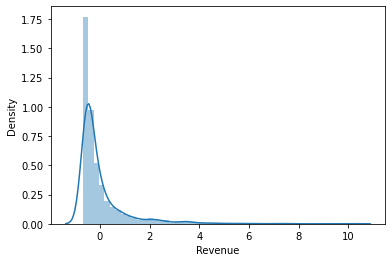

In [ ]:
sns.distplot(z_df.Revenue);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



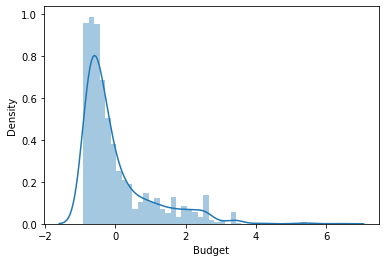

In [ ]:
sns.distplot(z_df.Budget);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



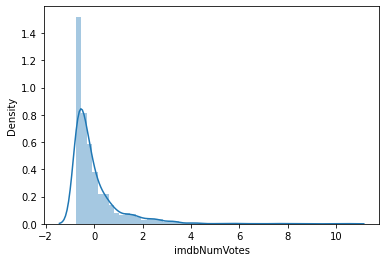

In [ ]:
sns.distplot(z_df.imdbNumVotes);

In [ ]:
z_df.describe()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,...,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03
mean,-3.509416e-15,2.180099e-15,5.378749e-15,9.537763e-16,5.332913e-16,-2.007047e-16,4.728809e-15,3.358528e-15,3.650836e-15,-1.278884e-15,...,-2.293523e-16,8.070045e-16,-5.319190e-16,-1.690517e-15,3.399286e-16,8.893621e-16,4.581900e-17,3.323807e-16,3.515249e-16,-2.171213e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.892616e-01,-3.183816e-01,-3.052632e-01,-3.088766e-01,-3.064708e-01,-3.580965e-01,-3.052632e-01,-3.100750e-01,-3.016213e-01,-2.905137e-01,...,-1.591630e-01,-8.997045e-02,-3.112704e-01,-3.700672e-01,-3.148388e-01,-2.486055e-02,-1.146365e-01,-4.243220e-01,-8.997045e-02,-6.589721e-02
25%,-2.892616e-01,-3.183816e-01,-3.052632e-01,-3.088766e-01,-3.064708e-01,-3.580965e-01,-3.052632e-01,-3.100750e-01,-3.016213e-01,-2.905137e-01,...,-1.591630e-01,-8.997045e-02,-3.112704e-01,-3.700672e-01,-3.148388e-01,-2.486055e-02,-1.146365e-01,-4.243220e-01,-8.997045e-02,-6.589721e-02
50%,-2.892616e-01,-3.183816e-01,-3.052632e-01,-3.088766e-01,-3.064708e-01,-3.580965e-01,-3.052632e-01,-3.100750e-01,-3.016213e-01,-2.905137e-01,...,-1.591630e-01,-8.997045e-02,-3.112704e-01,-3.700672e-01,-3.148388e-01,-2.486055e-02,-1.146365e-01,-4.243220e-01,-8.997045e-02,-6.589721e-02
75%,-2.892616e-01,-3.183816e-01,-3.052632e-01,-3.088766e-01,-3.064708e-01,-3.580965e-01,-3.052632e-01,-3.100750e-01,-3.016213e-01,-2.905137e-01,...,-1.591630e-01,-8.997045e-02,-3.112704e-01,-3.700672e-01,-3.148388e-01,-2.486055e-02,-1.146365e-01,-4.243220e-01,-8.997045e-02,-6.589721e-02
max,3.454941e+00,3.138944e+00,3.273837e+00,3.235538e+00,3.260937e+00,2.790817e+00,3.273837e+00,3.223033e+00,3.313366e+00,3.440051e+00,...,6.278982e+00,1.110789e+01,3.210656e+00,2.700542e+00,3.174265e+00,4.019951e+01,8.717833e+00,2.355245e+00,1.110789e+01,1.516577e+01


**detecting outliers**

In [ ]:
from scipy import stats

In [ ]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

**Z-score outlers**

In [ ]:
new_df.shape

(89, 58)



```
# This is formatted as code
```

No of outliers are 89

Using DB SCAN for outlier

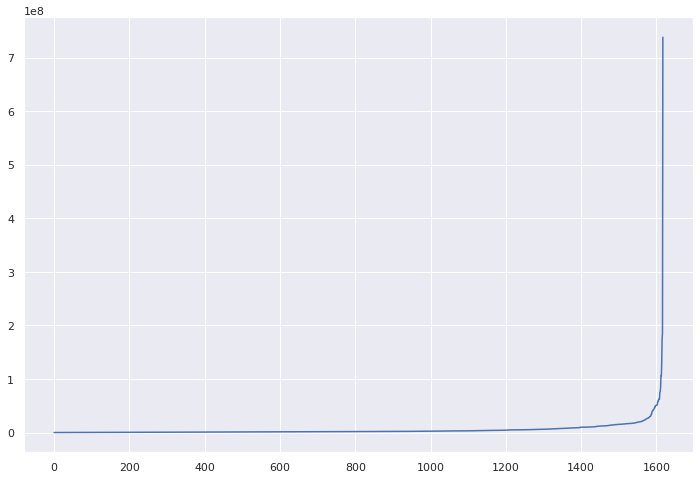

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=112)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

(10000000.0, 100000000.0)

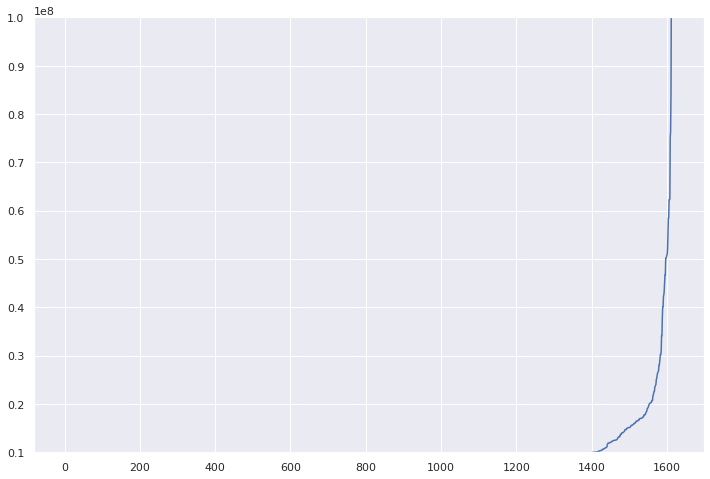

In [ ]:
plt.plot(distances)

plt.ylim([10000000,100000000])

epsilon can be taken as 25000000

In [ ]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(eps =27000000, min_samples =32).fit(df)
outlier_detection.labels_
n_outliers = np.count_nonzero(outlier_detection.labels_==-1)
print(n_outliers)

377


In [ ]:
list(outlier_detection.labels_)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1

**MIN-MAX Normalization**

In [ ]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [ ]:
normalized_df

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
normalized_df.describe()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,1618.000000,1618.000000,1618.00000,1618.000000,1618.000000,1618.000000,1618.00000,1618.000000,1618.000000,1618.000000,...,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000
mean,0.077256,0.092089,0.08529,0.087145,0.085909,0.113721,0.08529,0.087763,0.083436,0.077874,...,0.024722,0.008035,0.088381,0.120519,0.090235,0.000618,0.012979,0.152658,0.008035,0.004326
std,0.267080,0.289241,0.27940,0.282134,0.280316,0.317570,0.27940,0.283037,0.276626,0.268056,...,0.155324,0.089303,0.283936,0.325668,0.286607,0.024861,0.113219,0.359768,0.089303,0.065653
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
normalized_df[normalized_df.columns[1:]].corr()['Revenue'][:].nlargest(n=46)

Revenue                         1.000000
Budget                          0.693505
imdbNumVotes                    0.630850
Adventure                       0.422015
actors_popularity               0.344103
imdbRating                      0.278273
Sci-Fi                          0.252660
runtimeMinutes                  0.240271
Score_Rotten_Audience           0.231362
Action                          0.215292
producer_popularity             0.201024
tmdb_popularity                 0.198446
director_popularity             0.192263
Score_Rotten                    0.165781
Animation                       0.164302
release_date_quarter__2         0.139522
Rating__1                       0.101123
Fantasy                         0.085215
release_date_year__2019         0.068816
Rating__2                       0.050067
release_date_year__2018         0.043567
release_date_quarter__4         0.042890
release_date_year__2017         0.026836
release_date_year__2016         0.015065
release_date_yea

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



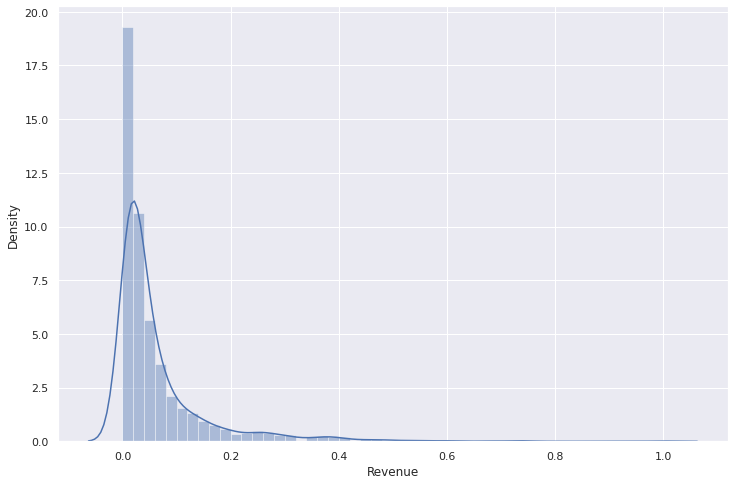

In [ ]:
sns.distplot(normalized_df.Revenue);

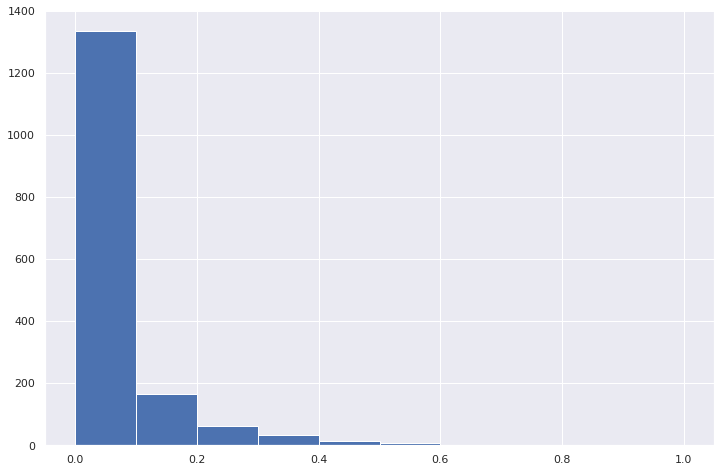

In [ ]:
plt.hist(normalized_df['Revenue']);

In [ ]:
normalized_df['Budget']

0       0.001040
1       0.004678
2       0.000415
3       0.007047
4       0.003821
          ...   
1613    0.051055
1614    0.189427
1615    0.023627
1616    0.094684
1617    0.056787
Name: Budget, Length: 1618, dtype: float64

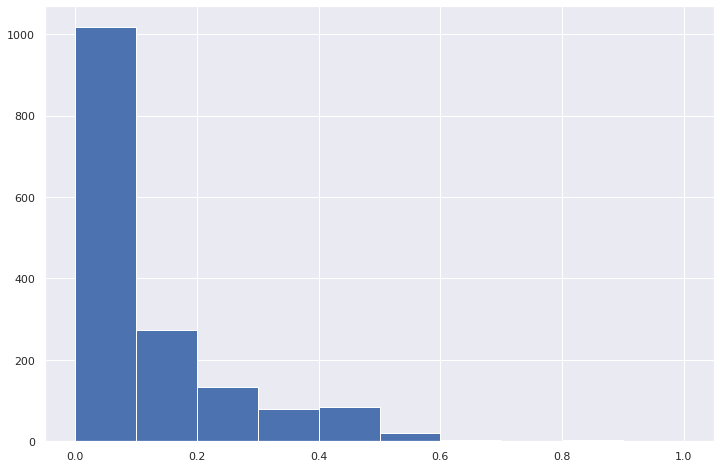

In [ ]:
plt.hist(normalized_df['Budget']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



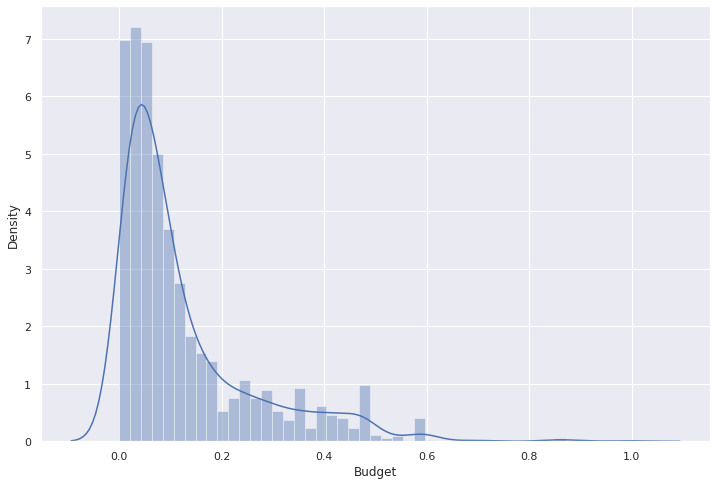

In [ ]:
sns.distplot(normalized_df.Budget);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



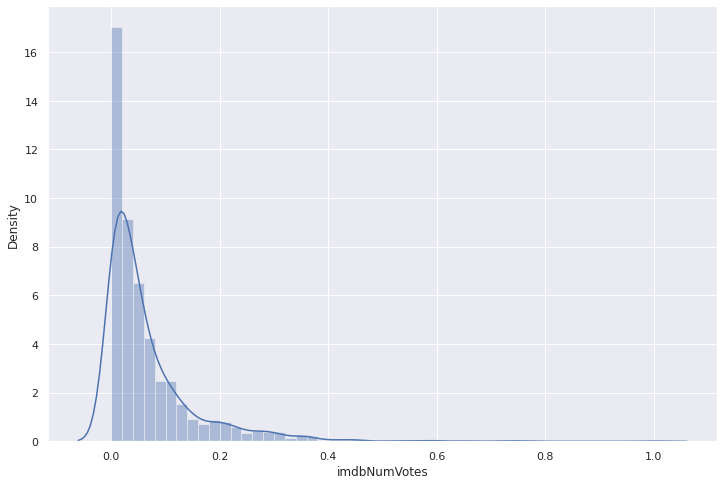

In [ ]:
sns.distplot(normalized_df.imdbNumVotes);

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from pandas.plotting import scatter_matrix

**Standardization**

**Standard scaler**

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,-0.289351,-0.318480,-0.305358,-0.308972,-0.306566,-0.358207,-0.305358,-0.310171,3.314391,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,-0.314936,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918
1,3.456009,-0.318480,-0.305358,-0.308972,-0.306566,-0.358207,-0.305358,-0.310171,-0.301715,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,-0.314936,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918
2,-0.289351,-0.318480,-0.305358,-0.308972,-0.306566,-0.358207,-0.305358,-0.310171,-0.301715,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,-0.314936,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918
3,-0.289351,-0.318480,-0.305358,-0.308972,3.261945,-0.358207,-0.305358,-0.310171,-0.301715,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,-0.314936,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918
4,-0.289351,3.139914,-0.305358,-0.308972,-0.306566,-0.358207,-0.305358,-0.310171,-0.301715,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,3.175247,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918


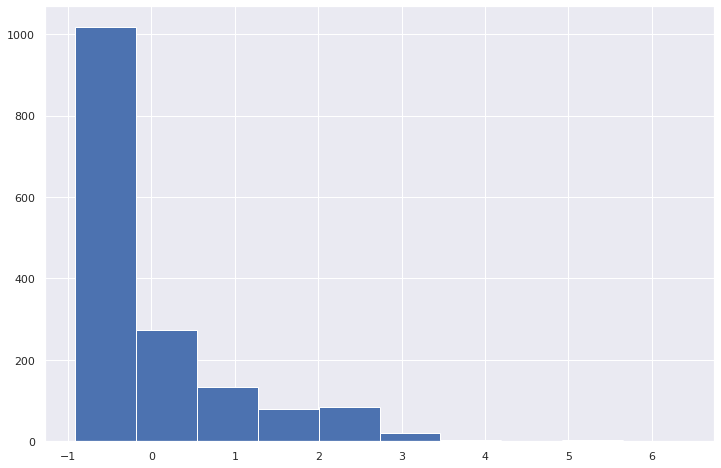

In [ ]:
plt.hist(df_scale['Budget']);

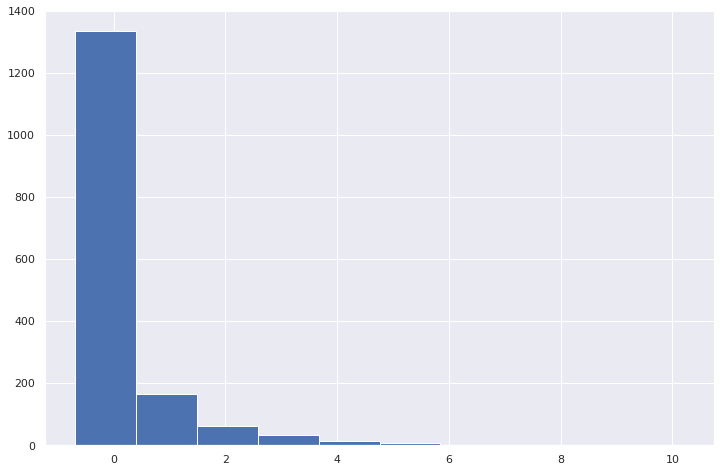

In [ ]:
plt.hist(df_scale['Revenue']);

**MIN-MAX SCALER**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


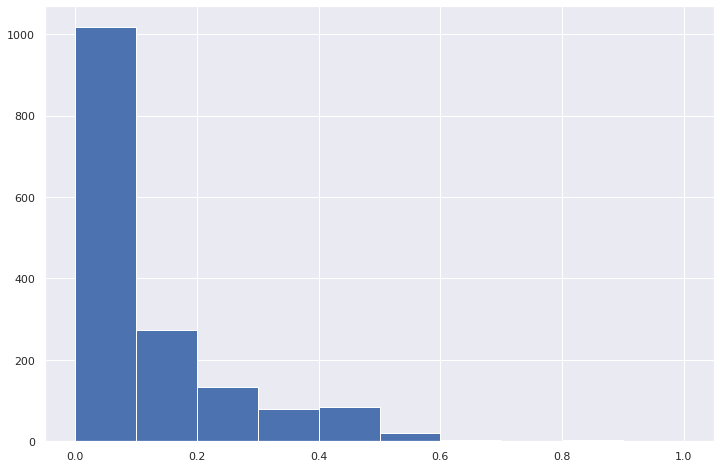

In [ ]:
plt.hist(df_scale['Budget']);

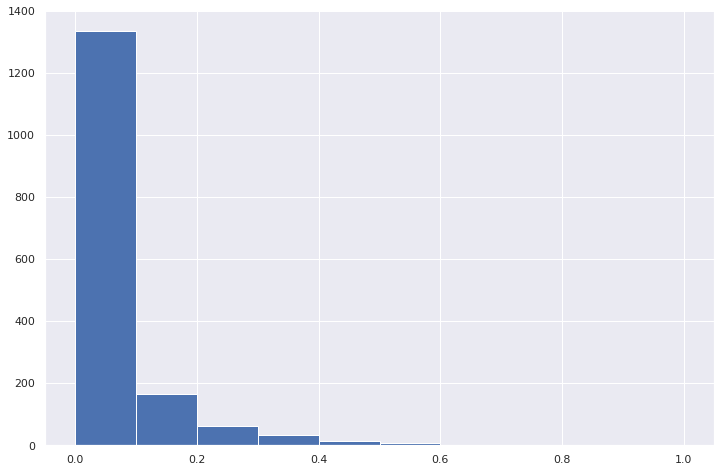

In [ ]:
plt.hist(df_scale['Revenue']);

**Feature Selection**

In [ ]:
!pip install mlxtend

In [ ]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
df_scale.columns

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [ ]:

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_scale.drop(labels=['Revenue'], axis=1),
    df['Revenue'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((1294, 57), (324, 57))

In [ ]:
# find and remove correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [ ]:
print(corr_features)

set()


In [ ]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1294, 57), (324, 57))

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
model.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)
print((rfe.support_==True).sum())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False  True
  True False False  True False False False  True  True  True False False
  True False False False  True False False False  True False False False
 False False False False False  True False False  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  9  4 20 24  5 22  1
  1 30 29  1 18  3  2  1  1  1 28  8  1 16 27 15  1 23 21 12  1 13  6  7
 17 10 26 14 25  1 11 19  1]
28


In [ ]:
# step forward feature selection
# Select 10 features based on optimal ROC_AUC scoring criteria

sfs1 = SFS(RandomForestRegressor(), 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)


In [ ]:

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   25.2s finished

[2022-05-04 02:37:17] Features: 1/20 -- score: 0.6008999669967351[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   36.1s finished

[2022-05-04 02:37:53] Features: 2/20 -- score: 0.6958729833453812[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   43.8s finished

[2022-05-04 02:38:36] Features: 3/20 -- score: 0.7500876135629987[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['release_date_year__2011', 'release_date_year__2012',
       'release_date_year__2019', 'release_date_year__2020',
       'release_date_year__2021', 'release_date_year__2022', 'Rating__1',
       'Rating__3', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__4', 'imdbNumVotes', 'NumTheatres',
       'director_popularity', 'TwitterScore', 'Adventure', 'History', 'Horror',
       'Musical', 'Short'],
      dtype='object')

Sequential backward selection

In [ ]:
# step backward feature selection
# Using 15 features with ROC_AUC scoring

sfs_backward = SFS(RandomForestRegressor(), 
           k_features=20, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs_backward = sfs_backward.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  2.8min finished

[2022-05-04 02:55:20] Features: 56/20 -- score: 0.7724773216841941[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  2.8min finished

[2022-05-04 02:58:08] Features: 55/20 -- score: 0.7709874254531847[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  2.7min finished

[2022-05-04 03:00:51] Features: 54/20 -- score: 0.7725589682973949[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
selected_feat_backward= X_train.columns[list(sfs_backward.k_feature_idx_)]
selected_feat_backward

Index(['release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2017', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021', 'Rating__5',
       'release_date_quarter__3', 'release_date_quarter__4', 'imdbNumVotes',
       'NumTheatres', 'Budget', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Horror', 'Thriller'],
      dtype='object')

Exhaustive search feature selection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
# exhaustive search
efs1 = EFS(RandomForestRegressor(n_jobs=4), 
           min_features=1,
           max_features=20, 
           scoring='r2',
           print_progress=True,
           cv=2)

efs1 = efs1.fit(np.array(X_train), y_train)

In [ ]:
X_train.columns[list(efs1.best_idx_)]

Mutual Information method

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([7.18885869e-03, 0.00000000e+00, 3.59704701e-03, 0.00000000e+00,
       1.08163989e-02, 0.00000000e+00, 1.59590746e-02, 0.00000000e+00,
       5.02462942e-03, 1.08315858e-02, 3.79295790e-02, 2.24001922e-02,
       3.63242380e-02, 0.00000000e+00, 1.45272248e-02, 2.43328730e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.47983221e-03,
       0.00000000e+00, 2.72813239e-01, 3.19774644e-02, 2.85197805e-01,
       8.97383831e-03, 4.71841725e-02, 6.37412597e-02, 5.27251928e-01,
       5.73779197e-02, 7.56462971e-02, 5.95389248e-02, 1.25035635e-01,
       5.41579818e-02, 3.72266059e-01, 4.44262553e-02, 9.44370746e-02,
       7.32190980e-03, 1.19021676e-02, 5.40465358e-04, 2.18038348e-02,
       5.73430616e-03, 2.16877291e-02, 0.00000000e+00, 1.07027152e-02,
       2.57599176e-04, 4.61806519e-04, 6.25817927e-03, 1.35786412e-03,
       0.00000000e+00, 1.03920737e-02, 2.46558452e-02, 4.69539630e-02,
       2.57599176e-04, 2.33664223e-03, 2.90241143e-04, 2.50135357e-03,
      

In [ ]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

NumTheatres                     0.527252
Budget                          0.372266
imdbNumVotes                    0.285198
tmdb_popularity                 0.272813
actors_popularity               0.125036
Adventure                       0.094437
director_popularity             0.075646
Score_Rotten_Audience           0.063741
producer_popularity             0.059539
mean_google_trend_popularity    0.057378
TwitterScore                    0.054158
Score_Rotten                    0.047184
Sci-Fi                          0.046954
Action                          0.044426
release_date_year__2020         0.037930
release_date_year__2022         0.036324
imdbRating                      0.031977
Romance                         0.024656
Rating__3                       0.024333
release_date_year__2021         0.022400
Crime                           0.021804
Drama                           0.021688
release_date_year__2016         0.015959
Rating__2                       0.014527
Biography       

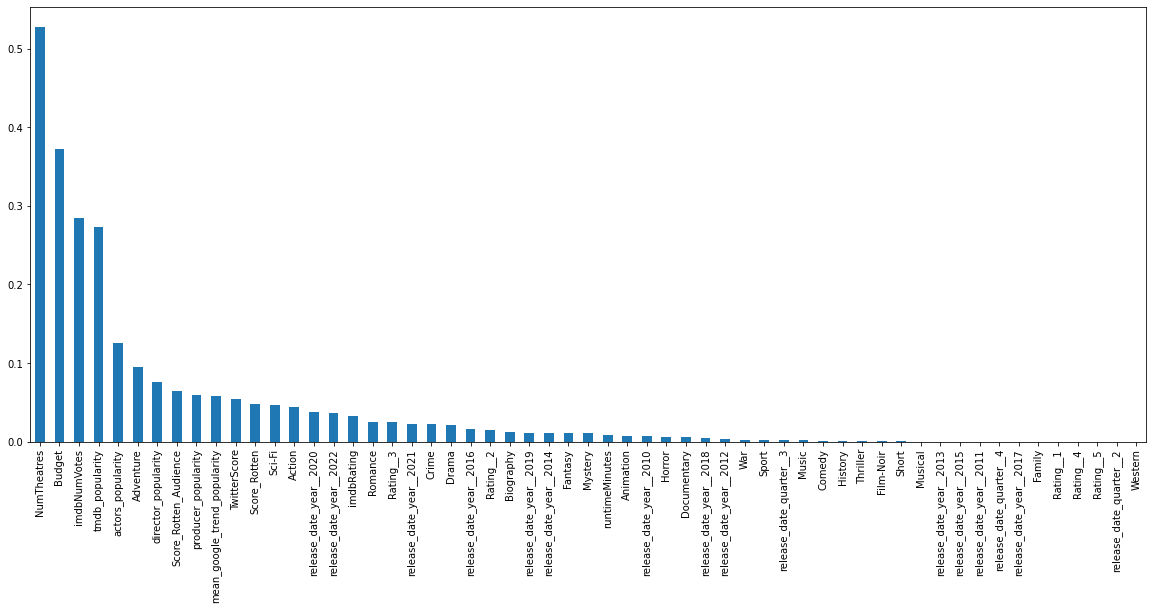

In [ ]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

Fischer Score: Chi Square

In [ ]:
from sklearn.feature_selection import chi2
# Calcualte the Fisher Score (chi2) between each feature and target
fisher_score = chi2(X_train.fillna(0), y_train)
fisher_score

(array([1192.        , 1173.        , 1185.65686275, 1177.        ,
        1180.        , 1139.        , 1185.        , 1179.        ,
        1185.        , 1198.        , 1243.        , 1220.        ,
        1242.68965517, 1114.        ,  575.09888579,  914.28835979,
        1293.        , 1293.        , 1040.        ,  921.        ,
         945.        ,  152.43117045,   33.7827656 ,  156.93096867,
          44.14890822,  138.52001864,   68.53498463,  159.13940402,
         104.69829438,  190.58860842,  145.10320054,   98.20093732,
          31.51620617,  199.2592052 ,  805.        ,  892.        ,
        1162.        , 1196.        ,  791.70858283, 1097.        ,
        1284.        ,  748.81066176, 1213.        , 1170.        ,
        1293.        , 1265.        , 1170.        , 1261.        ,
        1284.        , 1181.        , 1135.        , 1173.        ,
        1293.        , 1278.        , 1100.        , 1283.        ,
        1288.        ]),
 array([0.97763572, 0.9

In [ ]:
p_values = pd.Series(fisher_score[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=False)

mean_google_trend_popularity    1.000000
tmdb_popularity                 1.000000
Drama                           1.000000
Adventure                       1.000000
Action                          1.000000
Budget                          1.000000
TwitterScore                    1.000000
actors_popularity               1.000000
producer_popularity             1.000000
director_popularity             1.000000
NumTheatres                     1.000000
Score_Rotten_Audience           1.000000
Score_Rotten                    1.000000
runtimeMinutes                  1.000000
imdbNumVotes                    1.000000
imdbRating                      1.000000
Comedy                          1.000000
Rating__3                       1.000000
Rating__2                       1.000000
release_date_quarter__3         1.000000
release_date_quarter__4         1.000000
release_date_quarter__2         1.000000
Crime                           0.999973
Thriller                        0.999964
Rating__1       

**Feature Selection-Constant Feature Elimination**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# Remove constant features using VarianceThreshold
feature_selector = VarianceThreshold(threshold=0)

# Fit finds the features with zero variance
feature_selector.fit(X_train)
# Get Feature Support
# Returns True if value is not constant else False
feature_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
# Number of Features that are not constant
sum(feature_selector.get_support())

57

In [ ]:
# Features that are constant
[x for x in X_train.columns if x not in X_train.columns[feature_selector.get_support()]]

[]

Basic Correlation

In [ ]:
# Build a Dataframe with Correlation between Features
corr_matrix = X_train.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
#Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.6]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix
# corr_matrix.head()

,feature1,feature2,Correlation
0,Rating__2,Rating__3,0.717215
1,Rating__3,Rating__2,0.717215
2,imdbRating,Score_Rotten_Audience,0.657018
3,Score_Rotten_Audience,imdbRating,0.657018
4,Score_Rotten_Audience,Score_Rotten,0.653071
5,Score_Rotten,Score_Rotten_Audience,0.653071
6,imdbRating,Score_Rotten,0.625005
7,Score_Rotten,imdbRating,0.625005


In [ ]:
# Get groups of features that are correlated amongs themselves
grouped_features = []
correlated_groups = []

for feature in corr_matrix.feature1.unique():
    if feature not in grouped_features:
        # Find all features correlated to a single feature
        correlated_block = corr_matrix[corr_matrix.feature1 == feature]
        grouped_features = grouped_features + list(correlated_block.feature2.unique()) + [feature]
        
        # Append block of features to the list
        correlated_groups.append(correlated_block)

print('Found {} correlated feature groups'.format(len(correlated_groups)))
print('out of {} total features.'.format(X_train.shape[1]))

Found 2 correlated feature groups
out of 57 total features.


In [ ]:
# Visualize Correlated Feature Groups
for group in correlated_groups:
    print(group)
    print('\n')

    feature1   feature2  Correlation
0  Rating__2  Rating__3     0.717215


     feature1               feature2  Correlation
2  imdbRating  Score_Rotten_Audience     0.657018
6  imdbRating           Score_Rotten     0.625005




**Machine learning algorithms**

**Linear Regression**

In [ ]:
#training the model
normalized_df['Movie Title'] = li_movies
X = normalized_df.drop(['Revenue'], axis=1)
y= df['Revenue'] #prediction

In [ ]:
X_train_movie, X_test_movie, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
X_train = X_train_movie.drop(['Movie Title'],axis = 1)
X_test = X_test_movie.drop(['Movie Title'],axis = 1)

In [ ]:
#linear regression
from sklearn.metrics import r2_score
lm = LinearRegression() #our 6th model
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)
print("R Square: ", r2_score(y_test, lm_preds))

R Square:  0.6215609161364846


In [ ]:
print(lm_preds)

[ 2.69551342e+07 -2.07590171e+07  2.21895893e+07  5.18616492e+08
  2.82599925e+08  4.50962644e+07  4.26509749e+08 -2.72871973e+07
  2.11806794e+08  6.53886263e+07  3.77571514e+08 -7.63578986e+07
 -1.62383675e+07  2.34762185e+07  1.38372476e+06  2.08563943e+08
  2.84307560e+08  2.10045110e+08  6.10749072e+07  6.90305907e+07
 -7.88255361e+07  6.52073761e+05  3.34698894e+07 -8.95794663e+07
  1.35301571e+08  5.83454574e+07  6.29711800e+07  2.99783098e+08
  6.85651957e+07  5.20261352e+08 -1.06860646e+07  6.12369040e+07
  6.50300799e+08  2.43795528e+08  1.84105339e+08  1.33237257e+08
  7.47514768e+07  2.88622168e+08 -1.41046752e+07  1.38461588e+08
  7.78431277e+08 -3.90155034e+07  6.16017512e+08  2.16257664e+08
  4.61489387e+08  2.72590043e+07  2.55659785e+07  4.64071975e+08
  2.74983815e+08  9.04704462e+07 -1.89542284e+07  2.14142162e+08
  6.46506191e+07  1.52808702e+08  4.85096843e+07  1.98778625e+08
  8.86668880e+07  1.48852655e+07  9.88103801e+07  1.76711846e+08
  4.33059927e+08  2.00333

**Random forest**

In [ ]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: 0.6749255701432406


In [ ]:
print(lm_preds)

[ 2.69551342e+07 -2.07590171e+07  2.21895893e+07  5.18616492e+08
  2.82599925e+08  4.50962644e+07  4.26509749e+08 -2.72871973e+07
  2.11806794e+08  6.53886263e+07  3.77571514e+08 -7.63578986e+07
 -1.62383675e+07  2.34762185e+07  1.38372476e+06  2.08563943e+08
  2.84307560e+08  2.10045110e+08  6.10749072e+07  6.90305907e+07
 -7.88255361e+07  6.52073761e+05  3.34698894e+07 -8.95794663e+07
  1.35301571e+08  5.83454574e+07  6.29711800e+07  2.99783098e+08
  6.85651957e+07  5.20261352e+08 -1.06860646e+07  6.12369040e+07
  6.50300799e+08  2.43795528e+08  1.84105339e+08  1.33237257e+08
  7.47514768e+07  2.88622168e+08 -1.41046752e+07  1.38461588e+08
  7.78431277e+08 -3.90155034e+07  6.16017512e+08  2.16257664e+08
  4.61489387e+08  2.72590043e+07  2.55659785e+07  4.64071975e+08
  2.74983815e+08  9.04704462e+07 -1.89542284e+07  2.14142162e+08
  6.46506191e+07  1.52808702e+08  4.85096843e+07  1.98778625e+08
  8.86668880e+07  1.48852655e+07  9.88103801e+07  1.76711846e+08
  4.33059927e+08  2.00333

**LGB MODEL**

In [ ]:

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.1 MB/s 


In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [ ]:
lgb_model.fit(X_train, y_train)
predicted_y = lgb_model.predict(X_test)
print(metrics.r2_score(predicted_y, y_test))

0.7434371092290122


In [ ]:

d = {'Movie Title':X_test_movie['Movie Title'], 'Actual Revenue':y_test,'Predicted Revenue':predicted_y.astype('int')}
df_res = pd.DataFrame(data=d)
df_res

,Movie Title,Actual Revenue,Predicted Revenue
1206,All the Money in the World,56996304,65851710
453,Chernobyl Diaries,38390020,37419716
258,She's Out of My League,49779728,53452417
613,Fast & Furious 6,788680968,674918861
1611,Moonfall,39146894,297459079
...,...,...,...
1593,The Kashmir Files,24242170,180194734
631,The Hangover Part III,362000072,273833735
573,Rock of Ages,59418613,119882790
1361,Hustlers,157600000,136244560


In [ ]:
df_res.to_csv('/content/gdrive/My Drive/predicted_revenue.csv',encoding='utf-8')

In [ ]:
df_res['Act profit'] = (y_test-df['Budget'])

In [ ]:
df_labels = pd.DataFrame([],columns=['Budget'])

In [ ]:
df_labels

,Budget,Movie Title
3,3000000.0,Spanish Affair
8,2000000.0,My Mom Is a Character 2
19,1490000.0,Friends: Naki on the Monster Island
22,2581561.0,Conquest 1453
30,5650000.0,Kokowääh
...,...,...
1582,16200000.0,The Vault
1593,1950000.0,The Kashmir Files
1595,24000000.0,Scream
1602,11900000.0,The Wolf and the Lion


In [ ]:
df_rclass = pd.merge(df_labels,df_res,how='inner')

In [ ]:
df_rclass['Act profit'] = ((df_rclass['Actual Revenue']-df_rclass['Budget'].astype('int'))/df_rclass['Budget'].astype('int'))*100

In [ ]:
df_rclass['pred profit'] = ((df_rclass['Predicted Revenue']-df_rclass['Budget'].astype('int'))/df_rclass['Budget'].astype('int'))*100

In [ ]:
print(df_rclass)

          Budget                          Movie Title  Actual Revenue  \
0      3000000.0                       Spanish Affair        78768613   
1      2000000.0              My Mom Is a Character 2        39195565   
2      1490000.0  Friends: Naki on the Monster Island        22537428   
3      2581561.0                        Conquest 1453        35797045   
4      5650000.0                             Kokowääh        50447784   
..           ...                                  ...             ...   
400   16200000.0                            The Vault         8808878   
401    1950000.0                    The Kashmir Files        24242170   
402   24000000.0                               Scream       139813281   
403   11900000.0                The Wolf and the Lion        16296147   
404  146000000.0                             Moonfall        39146894   

     Predicted Revenue   Act profit  pred profit  
0              8705869  2525.620433   190.195633  
1             7757332

In [ ]:
li = []
for i in df_rclass['pred profit']:
  if(i>100):
    li.append(2)
  elif(i>=20 and i<100):
    li.append(1)
  else:
    li.append(0)
df_rclass['pred label'] = li

In [ ]:
li = []
for i in df_rclass['Act profit']:
  if(i>100):
    li.append(2)
  elif(i>=20 and i<100):
    li.append(1)
  else:
    li.append(0)
df_rclass['actual label'] = li

In [ ]:
df_rclass

,Budget,Movie Title,Actual Revenue,Predicted Revenue,Act profit,pred profit,pred label,actual label
0,3000000.0,Spanish Affair,78768613,8705869,2525.620433,190.195633,2,2
1,2000000.0,My Mom Is a Character 2,39195565,77573325,1859.778250,3778.666250,2,2
2,1490000.0,Friends: Naki on the Monster Island,22537428,52684324,1412.579060,3435.860671,2,2
3,2581561.0,Conquest 1453,35797045,38853292,1286.643391,1405.030948,2,2
4,5650000.0,Kokowääh,50447784,57766932,792.881133,922.423575,2,2
...,...,...,...,...,...,...,...,...
400,16200000.0,The Vault,8808878,6887874,-45.624210,-57.482259,0,0
401,1950000.0,The Kashmir Files,24242170,180194734,1143.188205,9140.755590,2,2
402,24000000.0,Scream,139813281,280584908,482.555338,1069.103783,2,2
403,11900000.0,The Wolf and the Lion,16296147,-7653696,36.942412,-164.316773,0,1


In [ ]:
df_rclass.to_csv('/content/gdrive/My Drive/predicted_label.csv',encoding='utf-8')

In [ ]:
count_2 = (df_rclass['actual label'] == 2).sum()

In [ ]:
print(count_2)

263


In [ ]:
(df_rclass['actual label'] == 1).sum()

78

In [ ]:
(df_rclass['actual label'] == 0).sum()

64

In [ ]:
li_acc = []
li_acc = df_rclass['pred label']-df_rclass['actual label']

In [ ]:
count = (df_rclass['pred label']-df_rclass['actual label'] == 0).sum()

In [ ]:
print(count)

271


In [ ]:
print(271/405)

0.6691358024691358


In [ ]:
li_acc.count(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. ser.count(level=1) should use ser.groupby(level=1).count().



ValueError: ignored

In [ ]:
df_labels['Budget'] = df['Budget']

In [ ]:
df_labels['Movie Title'] = li_movies

In [ ]:
df_labels = df_labels.loc[df_labels['Movie Title'].isin(X_test_movie['Movie Title'])]

In [ ]:
print(df['budget'])

KeyError: ignored

**Gradient Boosting Regressor**

In [ ]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



Training Score: 0.9545086658235515


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)
MSE = mean_squared_error(y_test, predictions2)
r2 = clf.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.4842577549427182e+16, R2: 0.7695097928988875


In [ ]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions

,predicted_revenue
0,6.292010e+07
1,4.870846e+07
2,5.781634e+07
3,6.293342e+08
4,3.849490e+08
...,...
400,1.553823e+08
401,3.035400e+08
402,1.085189e+08
403,1.403720e+08


In [ ]:
test_result = pd.concat([X_test_movie, gbr_predictions], axis = 1, sort=True)

test_result.head()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Movie Title,predicted_revenue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.292010e+07
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.870846e+07
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.781634e+07
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spanish Affair,6.293342e+08
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.849490e+08


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)

In [ ]:
print(predictions)

[82515097.20288764 82515110.12674628 82515105.03971499 82515125.99086012
 82515146.32773182 82515090.55002713 82515148.07278782 82515097.3370605
 82515124.5616658  82515096.82303719 82515142.50545394 82515089.04809968
 82515101.18648696 82515104.5001067  82515113.0473525  82515096.26189163
 82515138.13996314 82515120.31531543 82515108.02315822 82515097.73901394
 82515088.57437441 82515090.29774223 82515110.91957021 82515093.45296964
 82515115.24049194 82515091.19037344 82515108.27294606 82515142.04335533
 82515109.64882937 82515139.55212821 82515086.95299375 82515097.01130852
 82515143.44551446 82515115.02426156 82515116.46135868 82515114.13835749
 82515097.49775486 82515123.20581247 82515101.52785286 82515119.18862297
 82515148.31976777 82515089.90482304 82515138.62742123 82515127.15468268
 82515152.10029072 82515121.32360436 82515117.5498146  82515144.97933635
 82515109.71808967 82515106.90039793 82515114.0025044  82515103.6531336
 82515099.97638173 82515125.6667746  82515097.0918948

In [ ]:
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 135071073.44 degrees.
Accuracy: -234.62 %.


**Decision tree regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions = dr.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 92895783.16 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -21.28 %.


**XG BOOST**

In [ ]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(n_estimators=50)
xgboost.fit(X_train,y_train)
predictions=xgboost.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[05:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 65190492.94 degrees.
Accuracy: -81.08 %.


Deep Neural Netwaork

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7424      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 172,289
Trainable params: 172,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2)

Epoch 1/100
31/31 [==============================] - 5s 24ms/step - loss: 177345392.0000 - mean_absolute_error: 177345392.0000 - val_loss: 183637328.0000 - val_mean_absolute_error: 183637328.0000
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 177340928.0000 - mean_absolute_error: 177340928.0000 - val_loss: 183618128.0000 - val_mean_absolute_error: 183618128.0000
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 177240208.0000 - mean_absolute_error: 177240208.0000 - val_loss: 183325440.0000 - val_mean_absolute_error: 183325440.0000
Epoch 4/100
31/31 [==============================] - 0s 9ms/step - loss: 176380960.0000 - mean_absolute_error: 176380960.0000 - val_loss: 181397248.0000 - val_mean_absolute_error: 181397248.0000
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 172308128.0000 - mean_absolute_error: 172308128.0000 - val_loss: 173878432.0000 - val_mean_absolute_error: 173878432.0000
Epoch 6/100
31/31 [=====

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[[3.73867720e+07]
 [2.96045280e+07]
 [5.20676440e+07]
 [4.68830624e+08]
 [5.49513664e+08]
 [3.98162520e+07]
 [4.14024768e+08]
 [3.84050320e+07]
 [1.29046768e+08]
 [5.15481960e+07]
 [3.19551488e+08]
 [1.61717250e+07]
 [7.06553600e+07]
 [6.82059840e+07]
 [1.02046040e+07]
 [1.34891776e+08]
 [4.14839072e+08]
 [1.81250464e+08]
 [4.48010960e+07]
 [7.96786480e+07]
 [4.54005000e+06]
 [1.22953180e+07]
 [3.45767240e+07]
 [1.27562830e+07]
 [8.98281120e+07]
 [7.37049520e+07]
 [4.32254720e+07]
 [1.88559312e+08]
 [5.93755640e+07]
 [5.14980064e+08]
 [2.18374500e+07]
 [5.96061760e+07]
 [4.57232416e+08]
 [1.49199088e+08]
 [9.76697360e+07]
 [1.32837040e+08]
 [6.09741000e+07]
 [2.13937664e+08]
 [1.87221100e+07]
 [9.93907520e+07]
 [8.93837824e+08]
 [3.39692200e+07]
 [5.69415744e+08]
 [1.34054040e+08]
 [4.56226432e+08]
 [4.33498280e+07]
 [4.99268080e+07]
 [5.77376576e+08]
 [1.66373056e+08]
 [3.41138160e+07]
 [4.25612000e+07]
 [1.03653088e+08]
 [4.26461560e+07]
 [5.76825160e+07]
 [3.76619640e+07]
 [1.829866

In [ ]:
import numpy as np
errors = abs(predictions.flatten() - np.array(y_test))
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 67198250.4 degrees.
Accuracy: 4.63 %.


**Feature Reduction**

PCA Analysis

In [ ]:
pca = PCA(n_components=7)
pca.fit(X_train)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_scale)
pca_scale = pca.transform(df_scale)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3'])
print(pca.explained_variance_ratio_)